In [53]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

loading and splitting the data 

In [54]:
data = datasets.load_iris()

In [55]:
X = data["data"][:, 3:]

In [56]:
y = (data["target"] == 2).astype(np.int16)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

fitting the model 

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression()

In [61]:
lr_fitted = lr.fit(X_train,y_train)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [63]:
cross_val_score(lr, X_train, y_train, cv=3, scoring="accuracy")

array([0.97142857, 1.        , 0.91428571])

In [64]:
y_train_pred = lr_fitted.predict(X_train)

In [65]:
confusion_matrix(y_train,y_train_pred)

array([[70,  1],
       [ 3, 31]])

In [66]:
y_train_pred_cv = cross_val_predict(lr_fitted, X_train, y_train, cv=3)
confusion_matrix(y_train,y_train_pred_cv)

array([[70,  1],
       [ 3, 31]])

In [67]:
precision_score(y_train, y_train_pred)

0.96875

In [68]:
recall_score(y_train, y_train_pred)

0.9117647058823529

In [69]:
f1_score(y_train, y_train_pred)

0.9393939393939394

plot the Decision boundary

In [70]:
y_train_proba = lr_fitted.predict_proba(X_train)

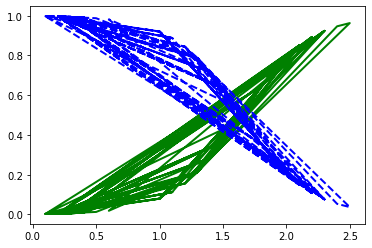

In [75]:
plt.plot(X_train, y_train_proba[:, 1], "g-",linewidth=2, label="Iris-Virginica")
plt.plot(X_train, y_train_proba[:, 0], "b--",linewidth=2, label="Not Iris-Virginica")

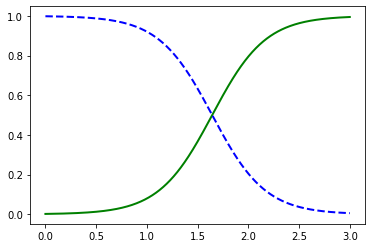

In [76]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/usr/lib/python3/dist-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


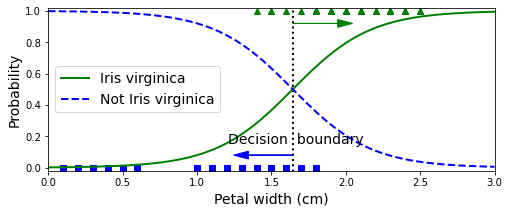

In [79]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()